In [1]:
%matplotlib notebook
from pathlib import Path
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from celluloid import Camera
from IPython.display import HTML

In [2]:
root = Path("nifti/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/")

In [3]:
list(root.parts)

['nifti',
 'FDG-PET-CT-Lesions',
 'PETCT_0011f3deaf',
 '03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445']

In [4]:
list(root.glob("*"))

[WindowsPath('nifti/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/CT.nii.gz'),
 WindowsPath('nifti/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/CTres.nii.gz'),
 WindowsPath('nifti/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/PET.nii.gz'),
 WindowsPath('nifti/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/SEG.nii.gz'),
 WindowsPath('nifti/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/SUV.nii.gz')]

In [5]:
PatientCT_Path = list(root.glob("CT*"))[0] 
PatientCTRes_Path = list(root.glob("CTres*"))[0] 
PatientPET_Path = list(root.glob("PET*"))[0] 
PatientSEG_Path = list(root.glob("SEG*"))[0] 
PatientSUV_Path = list(root.glob("SUV*"))[0] 

In [6]:
data = nib.load(PatientCT_Path)
ct = data.get_fdata()
data = nib.load(PatientCTRes_Path)
ctres = data.get_fdata()
data = nib.load(PatientPET_Path)
pet = data.get_fdata()
data = nib.load(PatientSEG_Path)
seg = data.get_fdata()
data = nib.load(PatientSUV_Path)
suv = data.get_fdata()

In [7]:
print("Shape:", seg.shape)
print("Data type:", seg.dtype)

Shape: (400, 400, 326)
Data type: float64


In [8]:
seg

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [9]:
print(seg.shape)
print(seg.min(), seg.max())


(400, 400, 326)
0.0 1.0


In [10]:
for i in range(1):
    print(seg[:,:,i])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
np_unique=np.unique(seg)

In [13]:
np_unique

array([0., 1.])

In [14]:
len(np_unique)

2

In [11]:
nonzero_slices = []  # To store slice indices with non-zero values

for slice_index in range(seg.shape[2]):
    if np.any(seg[:, :, slice_index] != 0):
        nonzero_slices.append(slice_index)

print("Non-zero value slices:", nonzero_slices)


Non-zero value slices: [231, 232, 233, 234, 235, 236, 237, 241, 242, 243, 244, 254, 255, 256, 294, 295, 296, 297, 298, 299, 300, 301, 302]


<IPython.core.display.Javascript object>


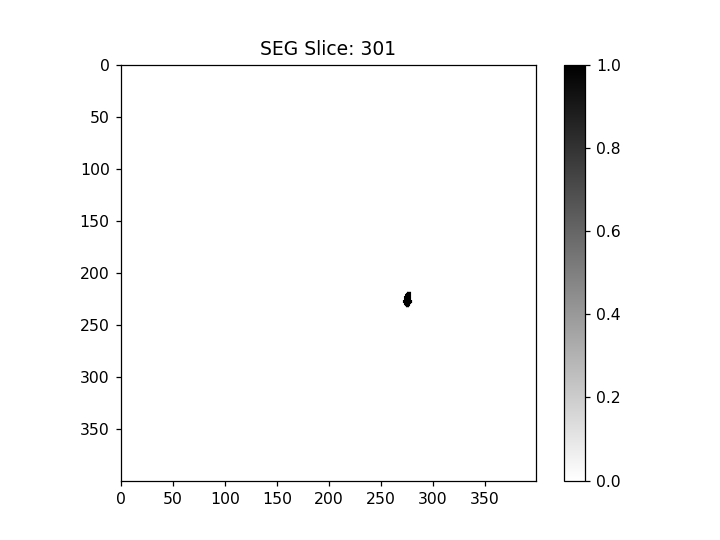

In [16]:
plt.imshow(seg[:, :, 301], cmap='gist_yarg')
plt.title(f"SEG Slice: 301")
plt.colorbar()
plt.show()

In [ ]:
fig = plt.figure()
camera = Camera(fig)  # Create the camera object from celluloid

for i in range(pet.shape[2]):  # Axial view
    plt.imshow(pet[:,:,i], cmap="gist_yarg")
    mask_ = np.ma.masked_where(seg[:,:,i]==0, seg[:,:,i])
    plt.imshow(mask_, alpha=0.5)
    # plt.axis("off")
    camera.snap()  # Store the current slice
plt.tight_layout()
animation = camera.animate()  # Create the animation


In [ ]:
HTML(animation.to_html5_video())